average from = 17714.0000  to = 24112.0000
{'type': 'b2b', 'salary': None}


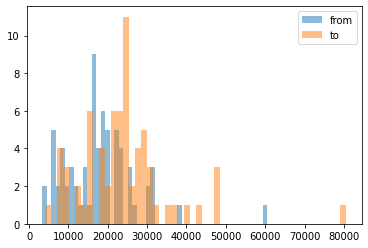

In [1]:
import requests
r = requests.get("https://justjoin.it/api/offers")
dataset = r.json()

eur = requests.get("http://api.nbp.pl/api/exchangerates/rates/a/eur/") 
eur_to_pln = eur.json()

usd = requests.get("http://api.nbp.pl/api/exchangerates/rates/a/usd/") 
usd_to_pln = usd.json()

gbp = requests.get("http://api.nbp.pl/api/exchangerates/rates/a/gbp/") 
gbp_to_pln = gbp.json()

kurs_eur = eur_to_pln["rates"][0]["mid"]
kurs_usd = usd_to_pln["rates"][0]["mid"]
kurs_gbp = gbp_to_pln["rates"][0]["mid"]
average_from = 0
average_to = 0
lower_salaries = []
higher_salaries = []
for job_offer in dataset[0:100]:
    try:
         if job_offer["employment_types"][0]["salary"]["currency"] == "pln":
            lower_salaries.append(job_offer["employment_types"][0]["salary"]["from"])
            higher_salaries.append(job_offer["employment_types"][0]["salary"]["to"])
         
         elif job_offer["employment_types"][0]["salary"]["currency"] == "eur": 
              lower_salaries.append(job_offer["employment_types"][0]["salary"]["from"] * kurs_eur)
              higher_salaries.append(job_offer["employment_types"][0]["salary"]["to"] * kurs_eur)

         elif job_offer["employment_types"][0]["salary"]["currency"] == "usd": 
              lower_salaries.append(job_offer["employment_types"][0]["salary"]["from"] * kurs_usd)
              higher_salaries.append(job_offer["employment_types"][0]["salary"]["to"] * kurs_usd)

         elif job_offer["employment_types"][0]["salary"]["currency"] == "usd": 
              lower_salaries.append(job_offer["employment_types"][0]["salary"]["from"] * kurs_gbp)
              higher_salaries.append(job_offer["employment_types"][0]["salary"]["to"] * kurs_gbp)

         #print(job_offer["employment_types"][0]["salary"])

    except:
        pass


average_from = round(sum(lower_salaries) / len(lower_salaries))
average_to = round(sum(higher_salaries) / len(higher_salaries))
print("average from = {:.4f}  to = {:.4f}".format(average_from, average_to))

list_b2b = []
#[list_b2b.append(x) for x in dataset[0:100]["employment_types"][0]["type"]]
print(dataset[0]["employment_types"][0])

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.hist(lower_salaries, bins = 50, alpha = 0.5, label = "from")
plt.hist(higher_salaries, bins = 50, alpha = 0.5, label = "to" )
plt.legend(loc = "upper right")
plt.show()


